In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 1.Data Ingestion:

In [2]:
day = pd.read_csv('day.csv')
hr = pd.read_csv('hour.csv')

In [3]:
hr.groupby('dteday')['cnt'].sum()

# here it is visible that if we groupby hour dataset by 'dteday' we get same 'cnt' as in day dataset
# therefore merging or appending doesn't make sense here
# Hence, proceeding with two different datasets

dteday
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-27    2114
2012-12-28    3095
2012-12-29    1341
2012-12-30    1796
2012-12-31    2729
Name: cnt, Length: 731, dtype: int64

In [4]:
hr.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

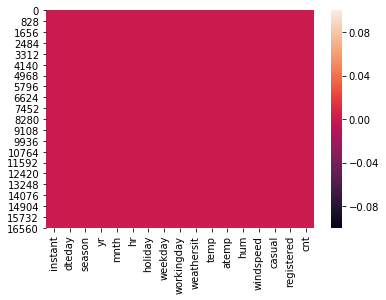

In [5]:
sns.heatmap(hr.isnull())
plt.show()

# no null values

In [6]:
hr.describe()

# descriptive stats here make sense only for 'temp','atemp,'hum','windspeed','casual','registered','cnt'
# As these are continuous attributes
# And rest of the data is either category converted in numbers or date

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### 2. Split Data set:

In [7]:
hr.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
hr.drop(['instant','dteday'],axis=1,inplace=True)

# 'instant' has all unique values as in it works as ID
# 'dteday' column has been recreated as year,month,week so its reduntant

In [9]:
x = hr.drop('cnt',axis=1)
y = hr['cnt']

# separating independent variables(x) and target variable(y) 

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=7)

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)
pred = lr.predict(xtest)
print("Training Score:",lr.score(xtrain,ytrain))
print("Testing Score:",lr.score(xtest,ytest))
from sklearn.metrics import r2_score
print("R Square Value:",r2_score(ytest,pred))

Training Score: 1.0
Testing Score: 1.0
R Square Value: 1.0


In [12]:
# Training and testing accuracy is same and its 1
# that means model is getting trained well and is predicted the values exactly the same as actual values
# R2 is 1 that mean SSE is zero
# hence, Actual values are equal to predicted values

# model is neiher underfit nor overfit it is perfect balance of bias variance tradeoff

### 3. Build a base model:

In [13]:
import statsmodels.api as sm
x['constant']=1
model=sm.OLS(endog=y,exog=x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.974e+30
Date:                Tue, 05 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:43:25   Log-Likelihood:             4.3530e+05
No. Observations:               17379   AIC:                        -8.706e+05
Df Residuals:                   17364   BIC:                        -8.705e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season     -1.108e-12   4.13e-14    -26.856      0.000   -1.19e-12   -1.03e-12
yr          6.025e-12   5.09e-14    118.396      0.000    5.93e-12    6.13e-12
mnth        1.887e-14   1.28e-14      1.472      0.141   -6.25e-15     4.4e-14
hr          4.219e-15   3.95e-15      1.067      0.286   -3.53e-15     1.2e-14
holiday     1.821e-14   1.52e-13      0.120      0.904   -2.79e-13    3.15e-13
weekday     1.088e-14   1.22e-14      0.889      0.374   -1.31e-14    3.49e-14
workingday  7.994e-14   6.19e-14      1.291      0.197   -4.14e-14    2.01e-13
weathersit  6.994e-14   4.31e-14      1.623      0.105   -1.45e-14    1.54e-13
temp        5.116e-13   8.36e-13      0.612      0.541   -1.13e-12    2.15e-12
atemp      -4.761e-13   9.39e-13     -0.507      0.612   -2.32e-12    1.37e-12
hum        -4.619e-14   1.63e-13     -0.284      0.777   -3.65e-13    2.73e-13
windspeed   -1.03e-13   2.18e-13     -0.473      0.636    -5.3e-13    3.24e-13
casual         1.0000   7.28e-16   1.37e+15      0.000       1.000       1.000
registered     1.0000   2.15e-16   4.66e+15      0.000       1.000       1.000
constant   -1.421e-14   1.61e-13     -0.088      0.930   -3.29e-13    3.01e-13
==============================================================================
Omnibus:                   127286.539   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1510.289
Skew:                          -0.014   Prob(JB):                         0.00
Kurtosis:                       1.556   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4. EDA -  Plots:

#### A.	Check for Outlier using Box plot and apply the formula to check how many of these data has outliers 

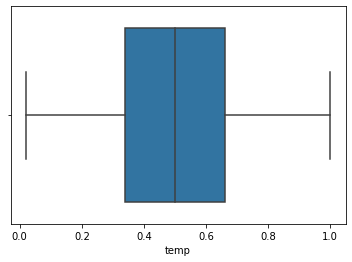

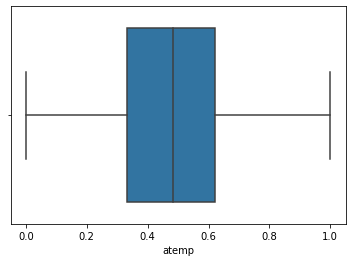

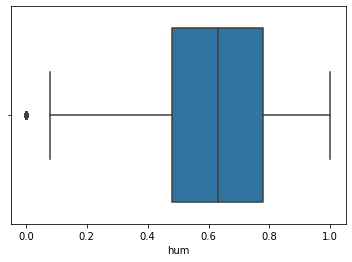

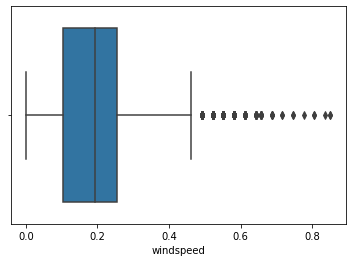

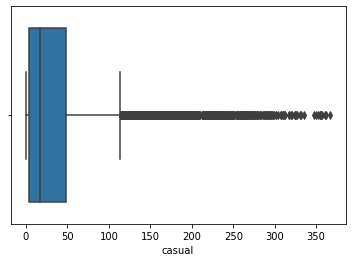

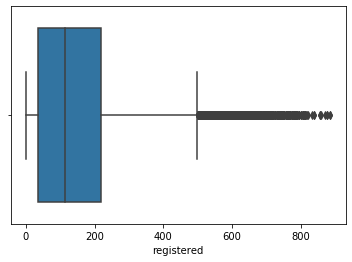

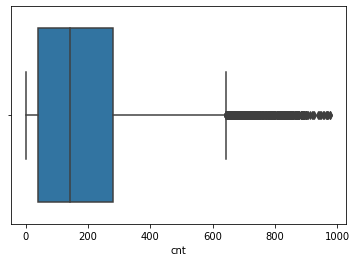

In [14]:
a = ['temp', 'atemp', 'hum', 'windspeed', 'casual','registered', 'cnt']
for i in range(len(a)):
    sns.boxplot(hr[a[i]])
    plt.show()

# no outliers in 'temp','atemp' column
# 'hum' has only 1 outlier
# all values in 'windspeed' when greater than 0.47 are outliers approximately
# all values in 'casual' when greater than 120 are outliers approximately
# all values in 'registeres' when greater than 500 are outliers approximately
# all values in 'cnt' when greater than 650 are outliers approximately

# Here, Box plot follows IQR method for outlier treatment

#### B.	Apply correlation plot and display with color code and numerical indication

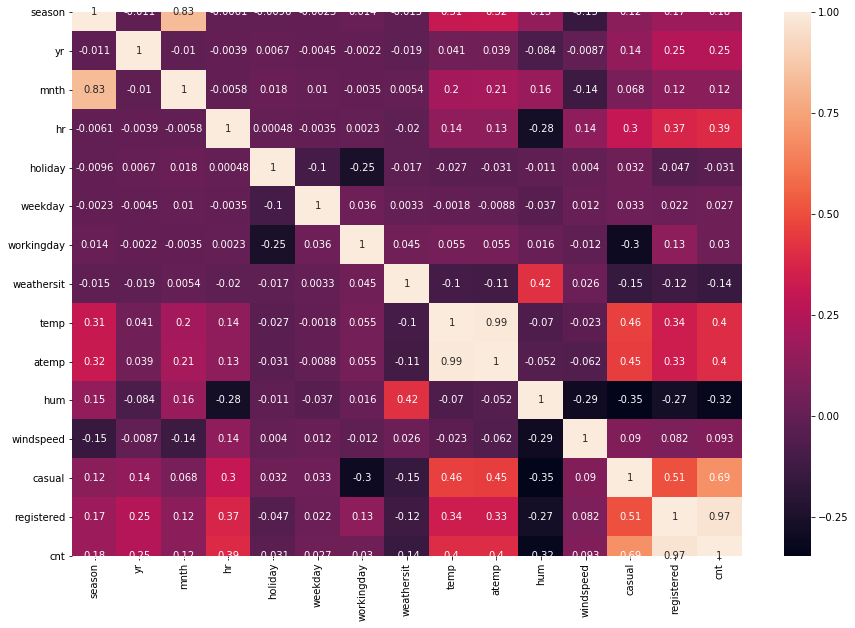

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(hr.corr(),annot=True)
plt.show()

# target variable 'cnt' has high correlation with 'registered','casual','hum','temp','atemp','hr','year'

#### C.	Plot best X with Y and find how the Y is varying with X. Like if X is continuous, go for scatter plot. if X is categorical, go for box plot.

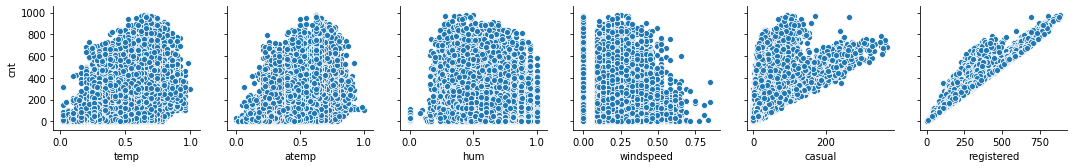

In [16]:
sns.pairplot(hr,y_vars='cnt',x_vars=['temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered'])
plt.show()

# High amount noise visible for temp,atemp,hum
# temp and atemp looks almost same
# casual and registered are above certain line but noise is still there, both show linear relationship as well

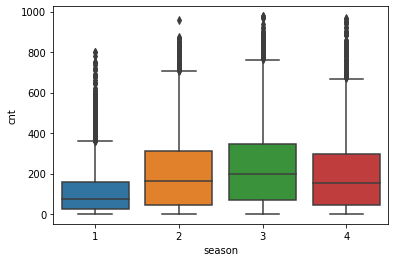

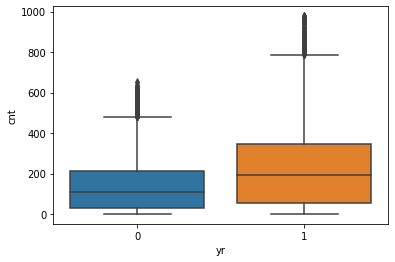

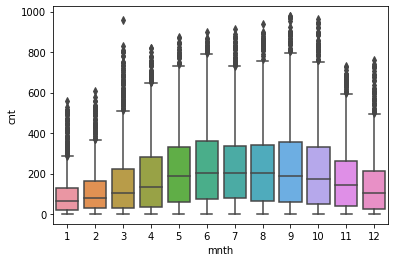

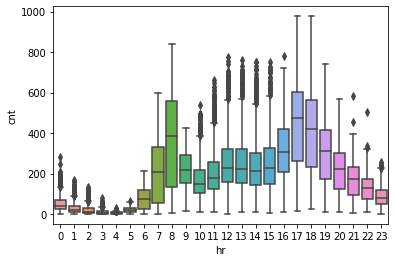

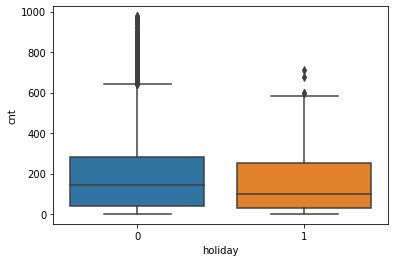

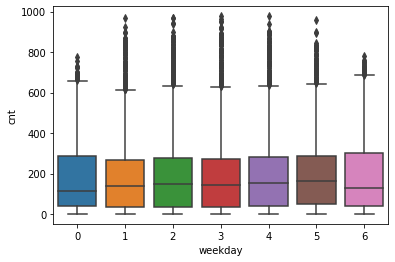

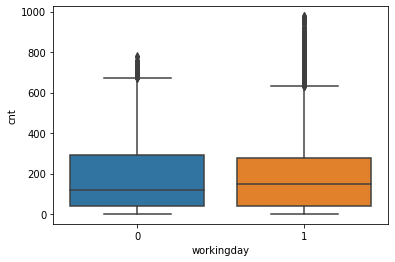

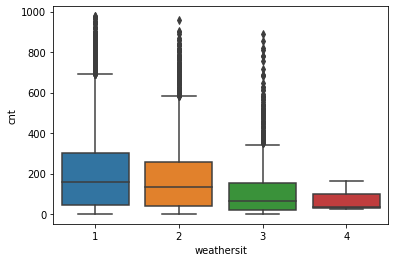

In [17]:
a = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit']
for i in range(len(a)):
    sns.boxplot(x=hr[a[i]],y=hr['cnt'])
    plt.show()
    
## Season 3 has highest cnt and season has lowest
## yr 1 has high cnt than yr 0
## mnth 6 has highest cnt and mnth 1 lowest, mnth three has a outlier in cnt above all mnths
## holiday 0 is higher than holiday 1
## weekday have almost no variation
## weathersit 1 has highest cnt and weather 4 has lowest

#### D.	Apply density plot and check if the data is normally distributed

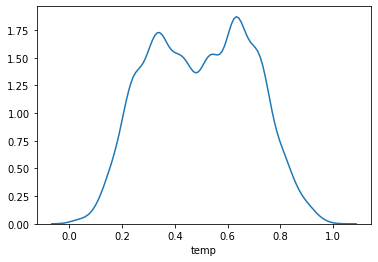

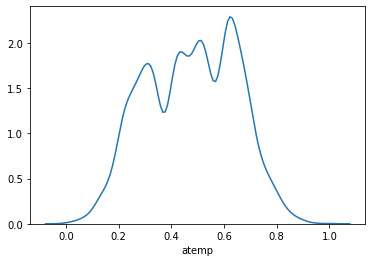

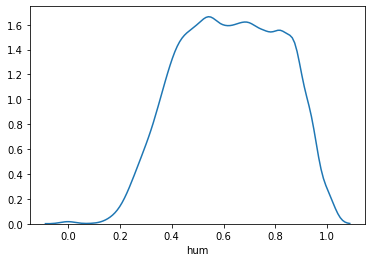

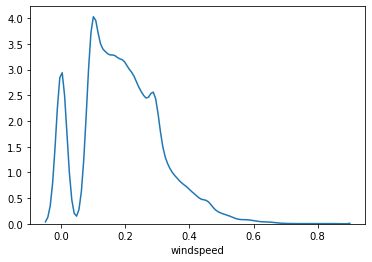

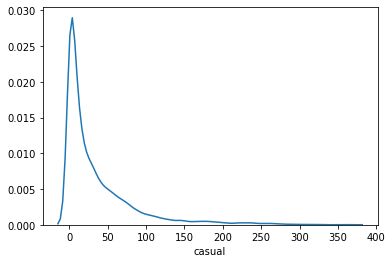

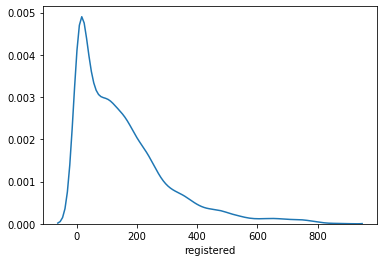

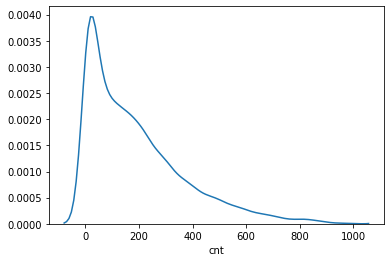

In [18]:
a = ['temp', 'atemp', 'hum', 'windspeed', 'casual','registered', 'cnt']
for i in range(len(a)):
    sns.distplot(hr[a[i]],hist=False)
    plt.show()
    
# temp has two peaks 
# atemp has three peaks
# hum is skewed left has more spread
# windspeed is not normal
# casual, registered and cnt are highly right skewed

### 5. EDA - Inference:

1. 'hum','windspeed' and 'casual' has outliers in it.'holiday' is having  dots but it is not an outlier as it has onlt values in it.Even though it is numerical variable but it is categorical by nature. We can treat the outliers by using the z_score or by using the interquartile range(q1 - 1.5 iqr, q1 + 1.5 iqr)

2. 'temp' and 'atemp' are perfectly correlated so we will remove on of them 'month' and 'season' has correlation of 0.83 so we will remove it. 'casual' and 'registered' has high correlation on 'cnt'.

3. 'regsitered', 'casual' with 'cnt' are linear in nature, as seen from the scatter plot, but the 'casual' is heterscedastic in nature.rest of the oher doesn't diplay any linear relationship with 'cnt'.

4. 'regsitered','cnt' display normal distribution.'casual' and 'windspeed' has right skewed distribution while 'hum' has left skewed distribution.'season','yr','mnth','holiday','weekday','workingday','weathersit' depicts groups in the data thus indicating categorical variable

5. for the 'cnt' comparison's with other numerical variable that 'season', 'yr', 'month','weathersit' show clear relation with the'cnt' variable.We could see a pattern in the boxplots.

### 6. Multi Collinearity Check:

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
hr['constant']=1
vif = [variance_inflation_factor(hr.values,i) for i in range(hr.shape[1])]
pd.DataFrame({'VIF':vif},index=hr.columns).T

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,constant
VIF,3.52741,1.09483,3.285116,1.262889,1.084497,1.017867,1.404402,1.283971,43.821366,44.06928,1.666538,1.199882,inf,inf,inf,43.671117


In [20]:
a = hr.drop(['atemp','casual','registered'],axis=1)
vif = [variance_inflation_factor(a.values,i) for i in range(a.shape[1])]
pd.DataFrame({'VIF':vif},index=a.columns).T

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,constant
VIF,3.522232,1.093082,3.284559,1.262296,1.081296,1.014459,1.07383,1.278404,1.312557,1.592021,1.140653,1.633316,40.038881


In [21]:
xtrain = xtrain.drop(['atemp','casual','registered'],axis=1)
xtest = xtest.drop(['atemp','casual','registered'],axis=1)
x = x.drop(['atemp','casual','registered'],axis=1)

#### According to VIF method atemp, casual and registered are mutlicollinear columns

### 7. Apply Feature selection technique:

#### Backward Elimination

H0: columns are notsignificant

H1: columns are significant

In [22]:
import statsmodels.api as sm
x['constant']=1
model=sm.OLS(endog=y,exog=x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     999.9
Date:                Tue, 05 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:43:33   Log-Likelihood:            -1.1078e+05
No. Observations:               17379   AIC:                         2.216e+05
Df Residuals:                   17367   BIC:                         2.217e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season        20.1942      1.820     11.098      0.000      16.628      23.761
yr            81.0405      2.166     37.409      0.000      76.794      85.287
mnth          -0.0497      0.568     -0.088      0.930      -1.162       1.063
hr             7.7054      0.165     46.716      0.000       7.382       8.029
holiday      -23.0244      6.697     -3.438      0.001     -36.151      -9.897
weekday        1.7464      0.541      3.230      0.001       0.687       2.806
workingday     3.8361      2.398      1.600      0.110      -0.864       8.536
weathersit    -3.9086      1.904     -2.052      0.040      -7.641      -0.176
temp         282.9157      6.038     46.860      0.000     271.082     294.750
hum         -196.0783      6.884    -28.481      0.000    -209.573    -182.584
windspeed     29.6297      9.399      3.152      0.002      11.206      48.053
constant     -15.3140      6.814     -2.248      0.025     -28.669      -1.959
==============================================================================
Omnibus:                     3429.293   Durbin-Watson:                   0.552
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6680.177
Skew:                           1.202   Prob(JB):                         0.00
Kurtosis:                       4.856   Cond. No.                         152.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
a = x.drop(['mnth'],axis=1)
model=sm.OLS(endog=y,exog=a).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     1100.
Date:                Tue, 05 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:43:33   Log-Likelihood:            -1.1078e+05
No. Observations:               17379   AIC:                         2.216e+05
Df Residuals:                   17368   BIC:                         2.217e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season        20.0640      1.048     19.139      0.000      18.009      22.119
yr            81.0390      2.166     37.410      0.000      76.793      85.285
hr             7.7049      0.165     46.740      0.000       7.382       8.028
holiday      -23.0503      6.690     -3.445      0.001     -36.164      -9.936
weekday        1.7450      0.540      3.229      0.001       0.686       2.804
workingday     3.8384      2.397      1.601      0.109      -0.861       8.538
weathersit    -3.9074      1.904     -2.052      0.040      -7.640      -0.175
temp         282.9697      6.006     47.117      0.000     271.198     294.742
hum         -196.1150      6.872    -28.540      0.000    -209.584    -182.646
windspeed     29.6315      9.399      3.153      0.002      11.209      48.054
constant     -15.3094      6.813     -2.247      0.025     -28.664      -1.955
==============================================================================
Omnibus:                     3429.416   Durbin-Watson:                   0.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6680.387
Skew:                           1.202   Prob(JB):                         0.00
Kurtosis:                       4.856   Cond. No.                         140.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### According to backward elimination

'mnth' is the only column that is insignificant

In [24]:
x_a = x.drop(['mnth'],axis=1)

x_atrain, x_atest,y_atrain,y_atest = train_test_split(x_a,y,test_size=0.3,random_state=7)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=7)
rf.fit(x_atrain,y_atrain)
print('Training score:',rf.score(x_atrain,y_atrain))
print('Testing score:',rf.score(x_atest,y_atest))

Training score: 0.9869533038588675
Testing score: 0.931301020514726


#### Using Chi Square

In [25]:
x = x.drop('constant',axis=1)

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print("Top 10Features are")
print()
print(featureScores.nlargest(10,'Score'))  #print 10 best features

Top 10Features are

        Specs         Score
3          hr  27475.219026
2        mnth   2136.620018
5     weekday   1133.844043
1          yr    940.658593
0      season    793.299030
4     holiday    627.754701
6  workingday    379.859731
8        temp    308.895121
7  weathersit    290.420629
9         hum    175.772175


In [27]:
x_a = x.drop(['windspeed'],axis=1)

x_atrain, x_atest,y_atrain,y_atest = train_test_split(x_a,y,test_size=0.3,random_state=7)

rf.fit(x_atrain,y_atrain)
print('Training score:',rf.score(x_atrain,y_atrain))
print('Testing score:',rf.score(x_atest,y_atest))

Training score: 0.98812216256794
Testing score: 0.9385954376785581


#### Feature Importance

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=7)
rf.fit(x,y)
rf_f = pd.DataFrame()
rf_f['columns'] = x.columns
rf_f['feature imp'] =rf.feature_importances_
print("Top 10Features are")
print()
print(rf_f.sort_values(by='feature imp',ascending=False).head(10))

Top 10Features are

       columns  feature imp
3           hr     0.606331
8         temp     0.137108
1           yr     0.080110
6   workingday     0.062702
9          hum     0.030258
0       season     0.021759
7   weathersit     0.017932
2         mnth     0.016883
5      weekday     0.014055
10   windspeed     0.010596


In [29]:
x_a = x.drop(['holiday'],axis=1)

x_atrain, x_atest,y_atrain,y_atest = train_test_split(x_a,y,test_size=0.3,random_state=7)

rf.fit(x_atrain,y_atrain)
print('Training score:',rf.score(x_atrain,y_atrain))
print('Testing score:',rf.score(x_atest,y_atest))

Training score: 0.9876874644033424
Testing score: 0.9365828483179003


#### Best accuracy obtained from chi square test

therefore dropping 'windspeed' from dataset

In [30]:
xtrain = xtrain.drop(['windspeed'],axis=1)
xtest = xtest.drop(['windspeed'],axis=1)
x = x.drop(['windspeed'],axis=1)

### 8. Data Transformation:

In [31]:
# before transformation
rf.fit(xtrain,ytrain)
print('Training score:',rf.score(xtrain,ytrain))
print('Testing score:',rf.score(xtest,ytest))

Training score: 0.98812216256794
Testing score: 0.9385954376785581


In [32]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xtrain_s = pd.DataFrame(ss.fit_transform(xtrain),columns=xtrain.columns)
xtest_s = pd.DataFrame(ss.transform(xtest),columns=xtest.columns)

# After Standard Scaler transformation
rf.fit(xtrain_s,ytrain)
print('Training score:',rf.score(xtrain_s,ytrain))
print('Testing score:',rf.score(xtest_s,ytest))

Training score: 0.9881370718184866
Testing score: 0.9386129587520952


In [33]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
xtrain_s = pd.DataFrame(mm.fit_transform(xtrain),columns=xtrain.columns)
xtest_s = pd.DataFrame(mm.transform(xtest),columns=xtest.columns)

# After MinMax transformation
rf.fit(xtrain_s,ytrain)
print('Training score:',rf.score(xtrain_s,ytrain))
print('Testing score:',rf.score(xtest_s,ytest))

Training score: 0.9881236633345571
Testing score: 0.9389055822413288


#### Standard Scaler gives the best results

In [34]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xtrain = pd.DataFrame(ss.fit_transform(xtrain),columns=xtrain.columns)
xtest = pd.DataFrame(ss.transform(xtest),columns=xtest.columns)

### 9. Apply feature engineering:

### 10. Output

In [35]:
## All the feature has been done above only

In [36]:
## Linear Regression
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(xtrain,ytrain)
lrtr = linr.score(xtrain,ytrain)
lrte = linr.score(xtest,ytest)
lrpr = linr.predict(xtest)
from sklearn.metrics import r2_score,mean_squared_error
lrr2 = r2_score(ytest,lrpr)
lrma = mean_squared_error(ytest,lrpr)**0.5

In [37]:
## Ridge Regression
from sklearn.linear_model import Ridge
l2 = Ridge(alpha=0.5)
l2.fit(xtrain,ytrain)
l2tr = l2.score(xtrain,ytrain)
l2te = l2.score(xtest,ytest)
l2pr = l2.predict(xtest)
l2r2 = r2_score(ytest,l2pr)
l2ma = mean_squared_error(ytest,l2pr)**0.5

In [38]:
## Lasso Regression
from sklearn.linear_model import Lasso
l1 = Lasso(alpha=0.5)
l1.fit(xtrain,ytrain)
l1tr = l1.score(xtrain,ytrain)
l1te = l1.score(xtest,ytest)
l1pr = l1.predict(xtest)
l1r2 = r2_score(ytest,l1pr)
l1ma = mean_squared_error(ytest,l1pr)**0.5

In [39]:
## ElasticNet Regression
from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(xtrain,ytrain)
entr = en.score(xtrain,ytrain)
ente = en.score(xtest,ytest)
enpr = en.predict(xtest)
enr2 = r2_score(ytest,enpr)
enma = mean_squared_error(ytest,enpr)**0.5

In [40]:
## DecisionTree Regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=7)
dt.fit(xtrain,ytrain)
dttr = dt.score(xtrain,ytrain)
dtte = dt.score(xtest,ytest)
dtpr = dt.predict(xtest)
dtr2 = r2_score(ytest,dtpr)
dtma = mean_squared_error(ytest,dtpr)**0.5

In [41]:
## RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=7)
rfr.fit(xtrain,ytrain)
rfrtr = rfr.score(xtrain,ytrain)
rfrte = rfr.score(xtest,ytest)
rfrpr = rfr.predict(xtest)
rfrr2 = r2_score(ytest,rfrpr)
rfrma = mean_squared_error(ytest,rfrpr)**0.5

In [42]:
mod = {'Model':["Linear Regression","Lasso","Ridge","ElasticNet",'DecisionTree','RandomForest'],
      'Training Score':[lrtr,l1tr,l2tr,entr,dttr,rfrtr],
      'Testing Score':[lrte,l1te,l2te,ente,dtte,rfrte],
      'R Squared':[lrr2,l1r2,l2r2,enr2,dtr2,rfrr2],
      'RMSE':[lrma,l1ma,l2ma,enma,dtma,rfrma]}

In [43]:
pd.DataFrame(mod)

,Model,Training Score,Testing Score,R Squared,RMSE
0,Linear Regression,0.390240,0.380428,0.380428,144.720228
1,Lasso,0.390169,0.380435,0.380435,144.719478
2,Ridge,0.390240,0.380429,0.380429,144.720192
3,ElasticNet,0.359679,0.351753,0.351753,148.031320
4,DecisionTree,0.999869,0.899763,0.899763,58.209871
5,RandomForest,0.988137,0.938613,0.938613,45.553510


#### RandomForest is the best performing algorithm as testing accuracy is better


##### Decision tree is overfitting, with high accuracy
##### Linear, ridge,lasso,elasti gave almost same results, low r2 score, still all overfitt